#Importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading dataset

In [4]:
df = pd.read_excel(r'advertising_sales_data.xlsx')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
# print(df.to_string())
# print(df.head())
# print(df.tail())
# print(df.info())
# print(df.columns)

In [5]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
# X = df[['TV', 'Radio', 'Newspaper']]
# y =  df['Sales']
# print(X)

# print(y)


In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:3])
X[:, 0:3] = imputer.transform(X[:, 0:3])

#Average amount spent on TV advertising in the dataset

In [7]:
arr = np.array(df[['TV']])
mean_tv = np.mean(arr)
print(mean_tv)       #average amount spent on TV advertising

147.0425


#correlation between radio advertising expenditure and product sales

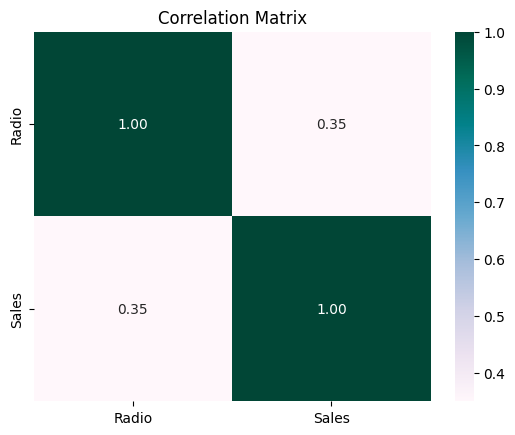

In [8]:
# correlation matrix for radio and salesq
rad = df[['Radio', 'Sales']]
radio_cor=rad.select_dtypes(include=['int64','float64'])
corr_matrix_rad=radio_cor.corr()
sns.heatmap(corr_matrix_rad,annot=True,cmap='PuBuGn',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#Which advertising medium has the highest impact on sales based on the dataset?


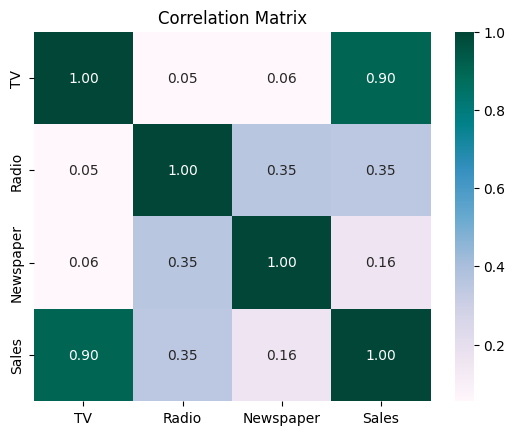

In [9]:
# correlation matrix for complete data
numeric_df=df.select_dtypes(include=['int64','float64'])
corr_matrix=numeric_df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='PuBuGn',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train1, X_test1, y_train1, y_test1 = X_train, X_test, y_train, y_test
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

#Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r_squared = regressor.score(X_test, y_test)
print("R-squared:", r_squared)


R-squared: 0.9059117026092904


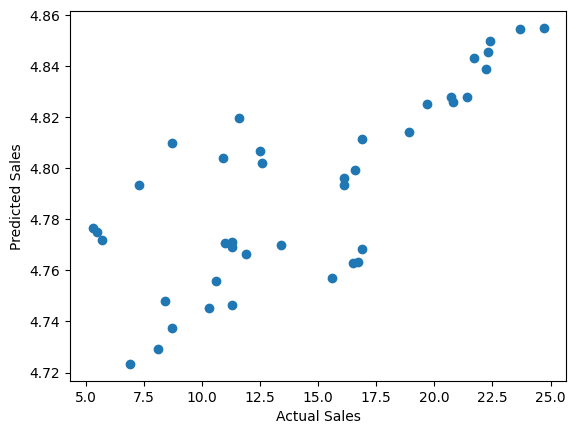

In [23]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

#Linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

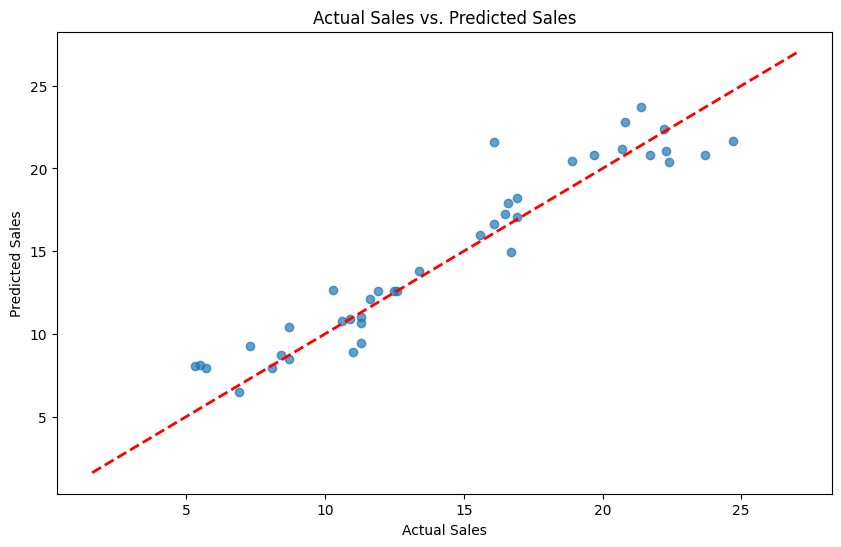

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Line for perfect prediction
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs. Predicted Sales')
plt.show()

#How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?


In [15]:
new_data=[[200, 40, 50]]
new_pred=regressor.predict(new_data)
print(new_pred)

[19.87104921]


#performance of the linear regression model change when the dataset is normalized

In [16]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train1[:,:] = sc.fit_transform(X_train1[:, :])
X_test1[:, :] = sc.transform(X_test1[:, :])
y_train1_2d = y_train1.reshape(-1, 1)  # Reshape to a column vector
y_train1_scaled = sc.fit_transform(y_train1_2d)

# Reshape y_test1 to a 2D array before scaling
y_test1_2d = y_test1.reshape(-1, 1)
y_test1_scaled = sc.transform(y_test1_2d)

# If you need y_train1 and y_test1 as 1D arrays later, you can flatten them:
y_train1 = y_train1_scaled.flatten()
y_test1 = y_test1_scaled.flatten()
# print(X_train1)
# print(X_test1)
# print(y_train1)
# print(y_test1)
np.round(X_train1, decimals=2, out=X_train1)
np.round(X_test1, decimals=2, out=X_test1)
np.round(y_train1, decimals=2, out=y_train1)
np.round(y_test1, decimals=2, out=y_test1)
# print(X_train)
# print(X_test)
# print(y_train1)
# print(y_test1)

array([0.6 , 0.82, 0.78, 0.22, 0.91, 0.43, 0.81, 0.27, 0.59, 0.57, 0.37,
       0.28, 0.6 , 0.15, 0.34, 0.59, 0.15, 0.59, 0.38, 0.68, 0.71, 0.43,
       0.37, 0.81, 0.38, 0.26, 0.79, 0.46, 0.35, 0.16, 0.55, 0.38, 0.87,
       0.28, 0.57, 0.75, 0.39, 0.76, 0.41, 0.21])

In [17]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)


LinearRegression()

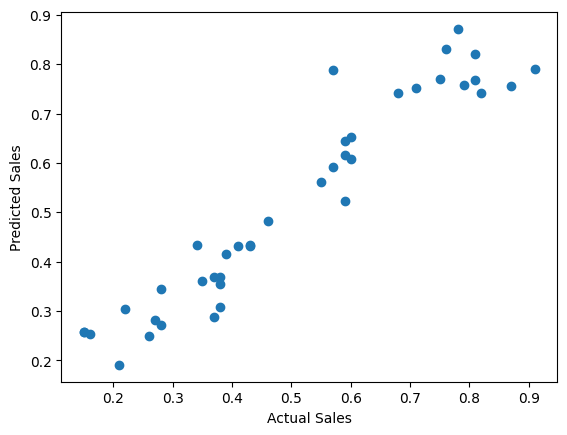

In [18]:
y_pred1 = regressor1.predict(X_test)
plt.scatter(y_test1,y_pred1)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

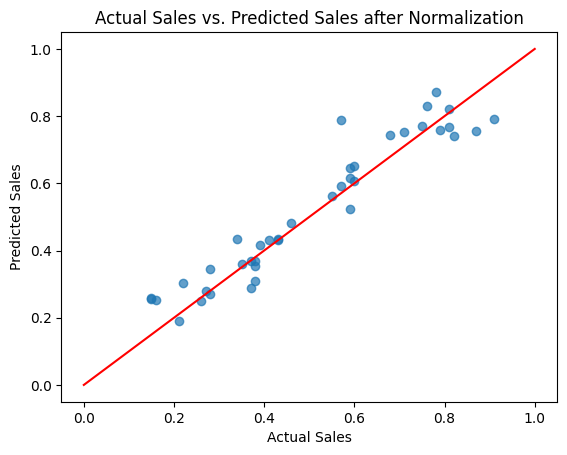

In [19]:
# plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred1, alpha=0.7)
# plt.ylim(0, 1)
# plt.xlim(0,1)
x = np.linspace(0, 1, 100)  # Creates 100 points from -5 to 5

# Calculate the corresponding y values for y = x
y = x

# Create the plot
plt.plot(x, y,color='red')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=1)  # Line for perfect prediction
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs. Predicted Sales after Normalization')
plt.show()

#impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Define the predictor variables excluding TV
X_radio_newspaper = df[['Radio', 'Newspaper']]
y1 = df['Sales']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_radio_newspaper_imputed = imputer.fit_transform(X_radio_newspaper)

# Split the data
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_radio_newspaper_imputed, y1, test_size=0.2, random_state=42)

# Train the model
model_rn = LinearRegression()
model_rn.fit(X_train_rn, y_train_rn)

# Evaluate the model
r_squared_rn = model_rn.score(X_test_rn, y_test_rn)
print("R-squared (Radio + Newspaper):", r_squared_rn)


R-squared (Radio + Newspaper): 0.10998637077378093
